In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from preprocessing import *

In [2]:
# Loading Data
data_raw = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/mxmh_survey_results.csv')

In [3]:
# Step 1: Dropping Features/Samples
    # Features
cols_drop = ['Permissions', 'Music effects', 'Timestamp', 'BPM']
drop_features = drop_irreleveant(data_raw, cols_drop)

    # Samples --> w/ NaN
drop_samples = drop_features.dropna()

In [4]:
# Step 2: Convert Mental Illness Scores to Categorical
features_range = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
data_ranged = convert_ranges(drop_samples, features_range)

/Users/JasonLebov_1/Desktop/CS 470/Final Project/CS470_FinalProject_Code/preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.cut(df[feature],
/Users/JasonLebov_1/Desktop/CS 470/Final Project/CS470_FinalProject_Code/preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.cut(df[feature],
/Users/JasonLebov_1/Desktop/CS 470/Final Project/CS470_FinalProject_Code/preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [5]:
# Step 3: One Hot Encode Features
cols_dummy = ["Primary streaming service", "Fav genre"]
one_hot_df = one_hot_encode(data_ranged, cols_dummy)

In [6]:
# Step 4: Label Encoding Features
encode_features_binary = ["While working" , "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
binary_options = ['No', 'Yes']
label_encoded_df = label_encode(one_hot_df, encode_features_binary, binary_options)

In [7]:
# Step 4 [cont]: Label Encoding Features
encode_features_cat = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', 
                   "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 
                   'Frequency [Video game music]']
cat_options = ['Never', 'Rarely', 'Sometimes', 'Very frequently']
label_encoded_df_final = label_encode(label_encoded_df, encode_features_cat, cat_options)

In [8]:
# Move Label's to End of DF
cols = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
numeric_df_final = label_end(label_encoded_df_final, cols)

In [9]:
# Step 5: Pearson Correlation Matrix - Features
cols_left_out = ['Anxiety', 'OCD', 'Insomnia', 'Depression']
feature_isolate = numeric_df_final.drop(columns=cols_left_out, axis=1)
feature_corr = pearson_matrix(feature_isolate)

In [10]:
# Step 5 [cont]: Dropping Highly Correlated Features --> Threshold (delta) = 0.5
delta_val = 0.5
corr_feature_drop = pearson_drop_delta(numeric_df_final, feature_corr, 0.75)

['Frequency [Hip hop]']


In [11]:
# Step 6: Creating 4 Datasets, for Each Illness
anxiety_df = corr_feature_drop.drop(columns=['Depression', 'OCD', 'Insomnia'], axis=1)
depression_df = corr_feature_drop.drop(columns=['Anxiety', 'OCD', 'Insomnia'], axis=1)
ocd_df = corr_feature_drop.drop(columns=['Anxiety', 'Depression', 'Insomnia'], axis=1)
insomnia_df = corr_feature_drop.drop(columns=['Anxiety', 'Depression', 'OCD'], axis=1)

In [12]:
# Step 6 [cont]: Removing 'Symptoms_' Prefix from Label Column
anxiety_df = remove_prefix(anxiety_df, 'Anxiety')
depression_df = remove_prefix(depression_df, 'Depression')
ocd_df = remove_prefix(ocd_df, 'OCD')
insomnia_df = remove_prefix(insomnia_df, 'Insomnia')

In [13]:
# Step 7: Label Encoding Label Feature
feature_options = ['Asymptomatic', 'Mild', 'Moderate', 'Severe']

anxiety_encoded = label_encode(anxiety_df, ['Anxiety'], feature_options)
depression_encoded = label_encode(depression_df, ['Depression'], feature_options)
ocd_encoded = label_encode(ocd_df, ['OCD'], feature_options)
insomnia_encoded = label_encode(insomnia_df, ['Insomnia'], feature_options)

In [14]:
# Step 8: Rerun of Pearson Correlation for Labels

anxiety_corr = pearson_matrix(anxiety_encoded)
depression_corr = pearson_matrix(depression_encoded)
ocd_corr = pearson_matrix(ocd_encoded)
insomnia_corr = pearson_matrix(insomnia_encoded)

In [15]:
# Step 8 [cont]: Dropping Highly Correlated Features to Label --> Threshold (gamma) = 0.01
anxiety_drop = pearson_drop_gamma(anxiety_encoded, anxiety_corr, 0.01)
depression_drop = pearson_drop_gamma(depression_encoded, depression_corr, 0.01)
ocd_drop = pearson_drop_gamma(ocd_encoded, ocd_corr, 0.01)
insomnia_drop = pearson_drop_gamma(insomnia_encoded, insomnia_corr, 0.01)

features_to_drop = set(anxiety_drop).intersection(depression_drop, ocd_drop, insomnia_drop)

['Fav genre_Video game music', 'Frequency [Jazz]', 'Fav genre_Lofi', 'Frequency [Country]']
['Fav genre_Folk', 'Fav genre_Jazz', 'Frequency [Classical]', 'Frequency [K pop]', 'Fav genre_Video game music']
['Frequency [Metal]', 'Primary streaming service_Apple Music', 'Fav genre_Hip hop', 'Fav genre_Country', 'Frequency [Classical]', 'Fav genre_Classical', 'Fav genre_R&B', 'Frequency [Latin]', 'Frequency [Gospel]']
['Fav genre_Folk', 'Fav genre_Jazz', 'Primary streaming service_I do not use a streaming service.', 'Fav genre_Classical', 'Frequency [K pop]']


In [16]:
features_to_drop

set()

In [17]:
anxiety_final_full = drop_irreleveant(anxiety_encoded, features_to_drop)
depression_final_full = drop_irreleveant(depression_encoded, features_to_drop)
ocd_final_full = drop_irreleveant(ocd_encoded, features_to_drop)
insomnia_final_full = drop_irreleveant(insomnia_encoded, features_to_drop)

In [18]:
# Step 9: Create Train-Test-Splits of Data
anxiety_train, anxiety_test = data_split(anxiety_final_full)
depression_train, depression_test = data_split(depression_final_full)
ocd_train, ocd_test = data_split(ocd_final_full)
insomnia_train, insomnia_test = data_split(insomnia_final_full)

In [19]:
display(anxiety_final_full.shape)
display(depression_final_full.shape)
display(ocd_final_full.shape)
display(insomnia_final_full.shape)

(725, 45)

(725, 45)

(725, 45)

(725, 45)

In [20]:
# Step 10: Min-Max Scaling --> Only on Training Data
cols_scale = anxiety_final_full.iloc[:, :-1].columns
anxiety_train_final, anxiety_test_final = min_max_scale(anxiety_train, anxiety_test, cols_scale)
depression_train_final, depression_test_final = data_split(depression_final_full)
ocd_train_final, ocd_test_final = data_split(ocd_final_full)
insomnia_train_final, insomnia_test_final = data_split(insomnia_final_full)

In [21]:
# Step 11: Save Files to CSV

    # Save ' '_final_full
anxiety_final_full.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/anxiety_final_full.csv', index=False)
depression_final_full.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/depression_final_full.csv', index=False)
ocd_final_full.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/ocd_final_full.csv', index=False)
insomnia_final_full.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/insomnia_final_full.csv', index=False)

    # Save Train-Test-Splits
anxiety_train_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/anxiety_train_final.csv', index=False)
anxiety_test_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/anxiety_test_final.csv', index=False)

depression_train_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/depression_train_final.csv', index=False)
depression_test_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/depression_test_final.csv', index=False)

ocd_train_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/ocd_train_final.csv', index=False)
ocd_test_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/ocd_test_final.csv', index=False)

insomnia_train_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/insomnia_train_final.csv', index=False)
insomnia_test_final.to_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/insomnia_test_final.csv', index=False)

Visualizations

<Axes: title={'center': 'Pearson Correlation Matrix of Features'}>

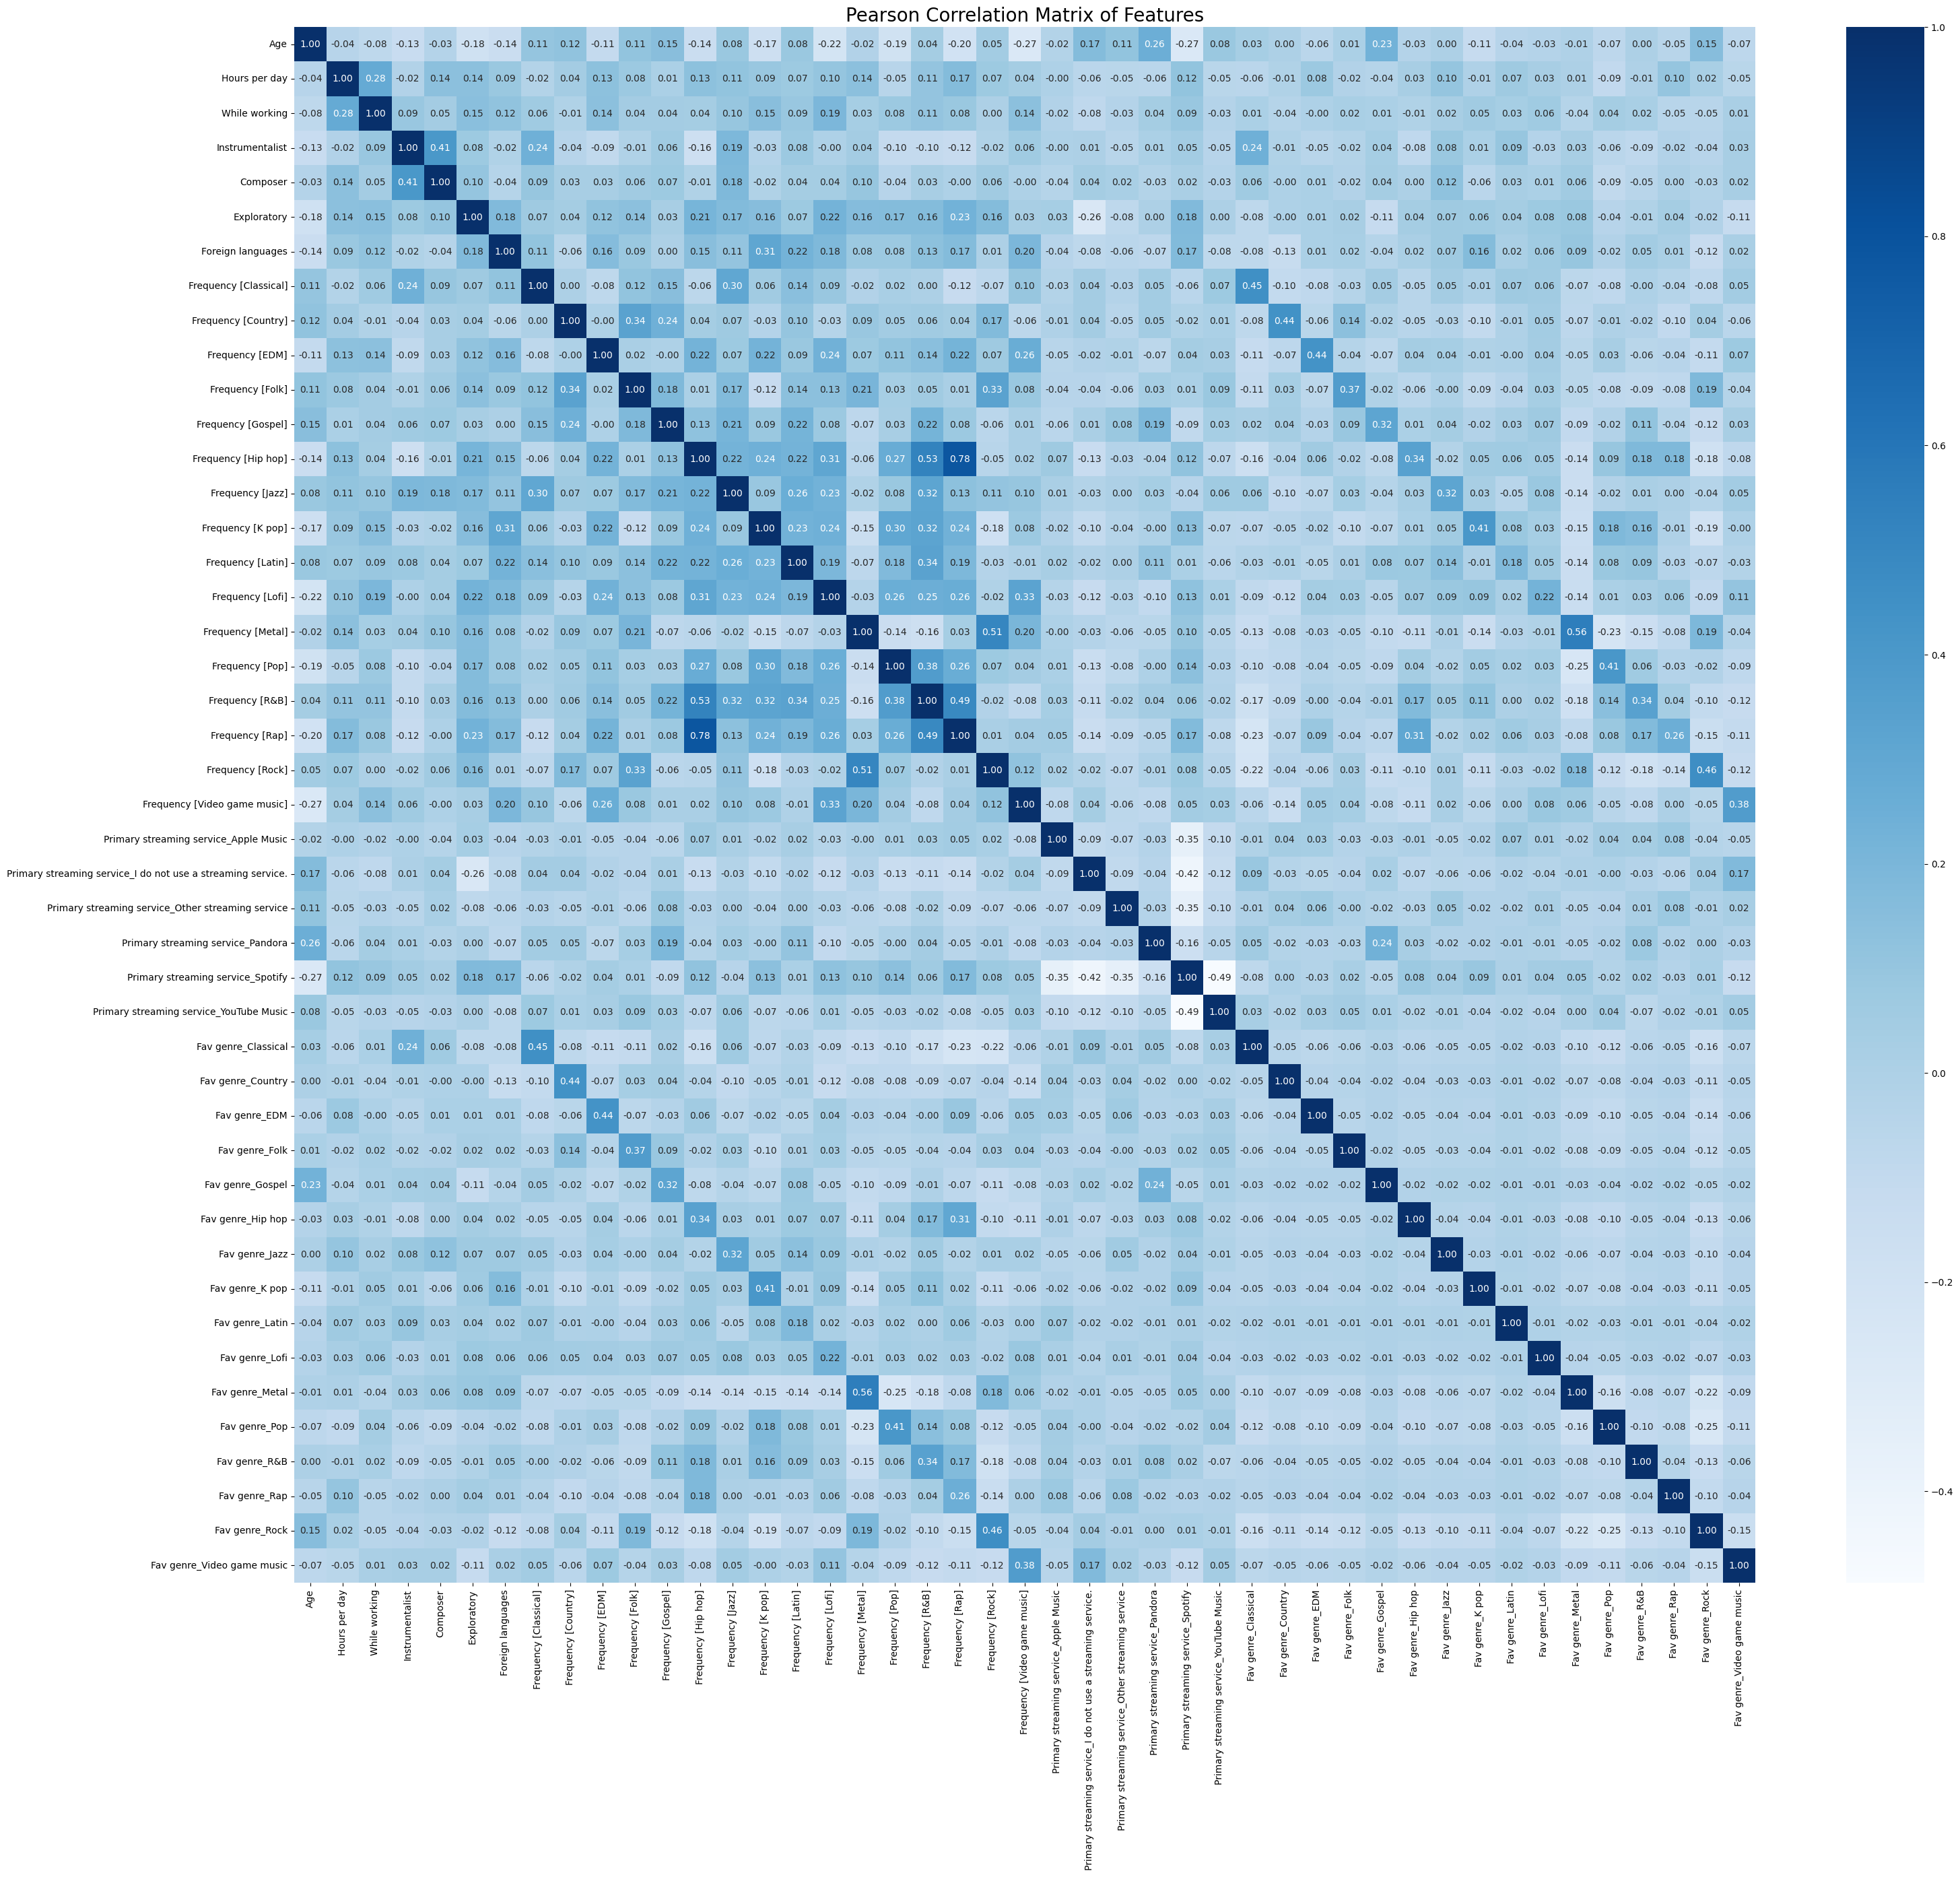

In [22]:
# Graph of Pearson Correlation Matrices - Features
plt.figure(figsize=(35,30)) # 35, 30
plt.title('Pearson Correlation Matrix of Features', fontsize=20)
sns.heatmap(feature_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

In [23]:
# Graph of Pearson Correlation Matrices - Labels

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs Anxiety'}>

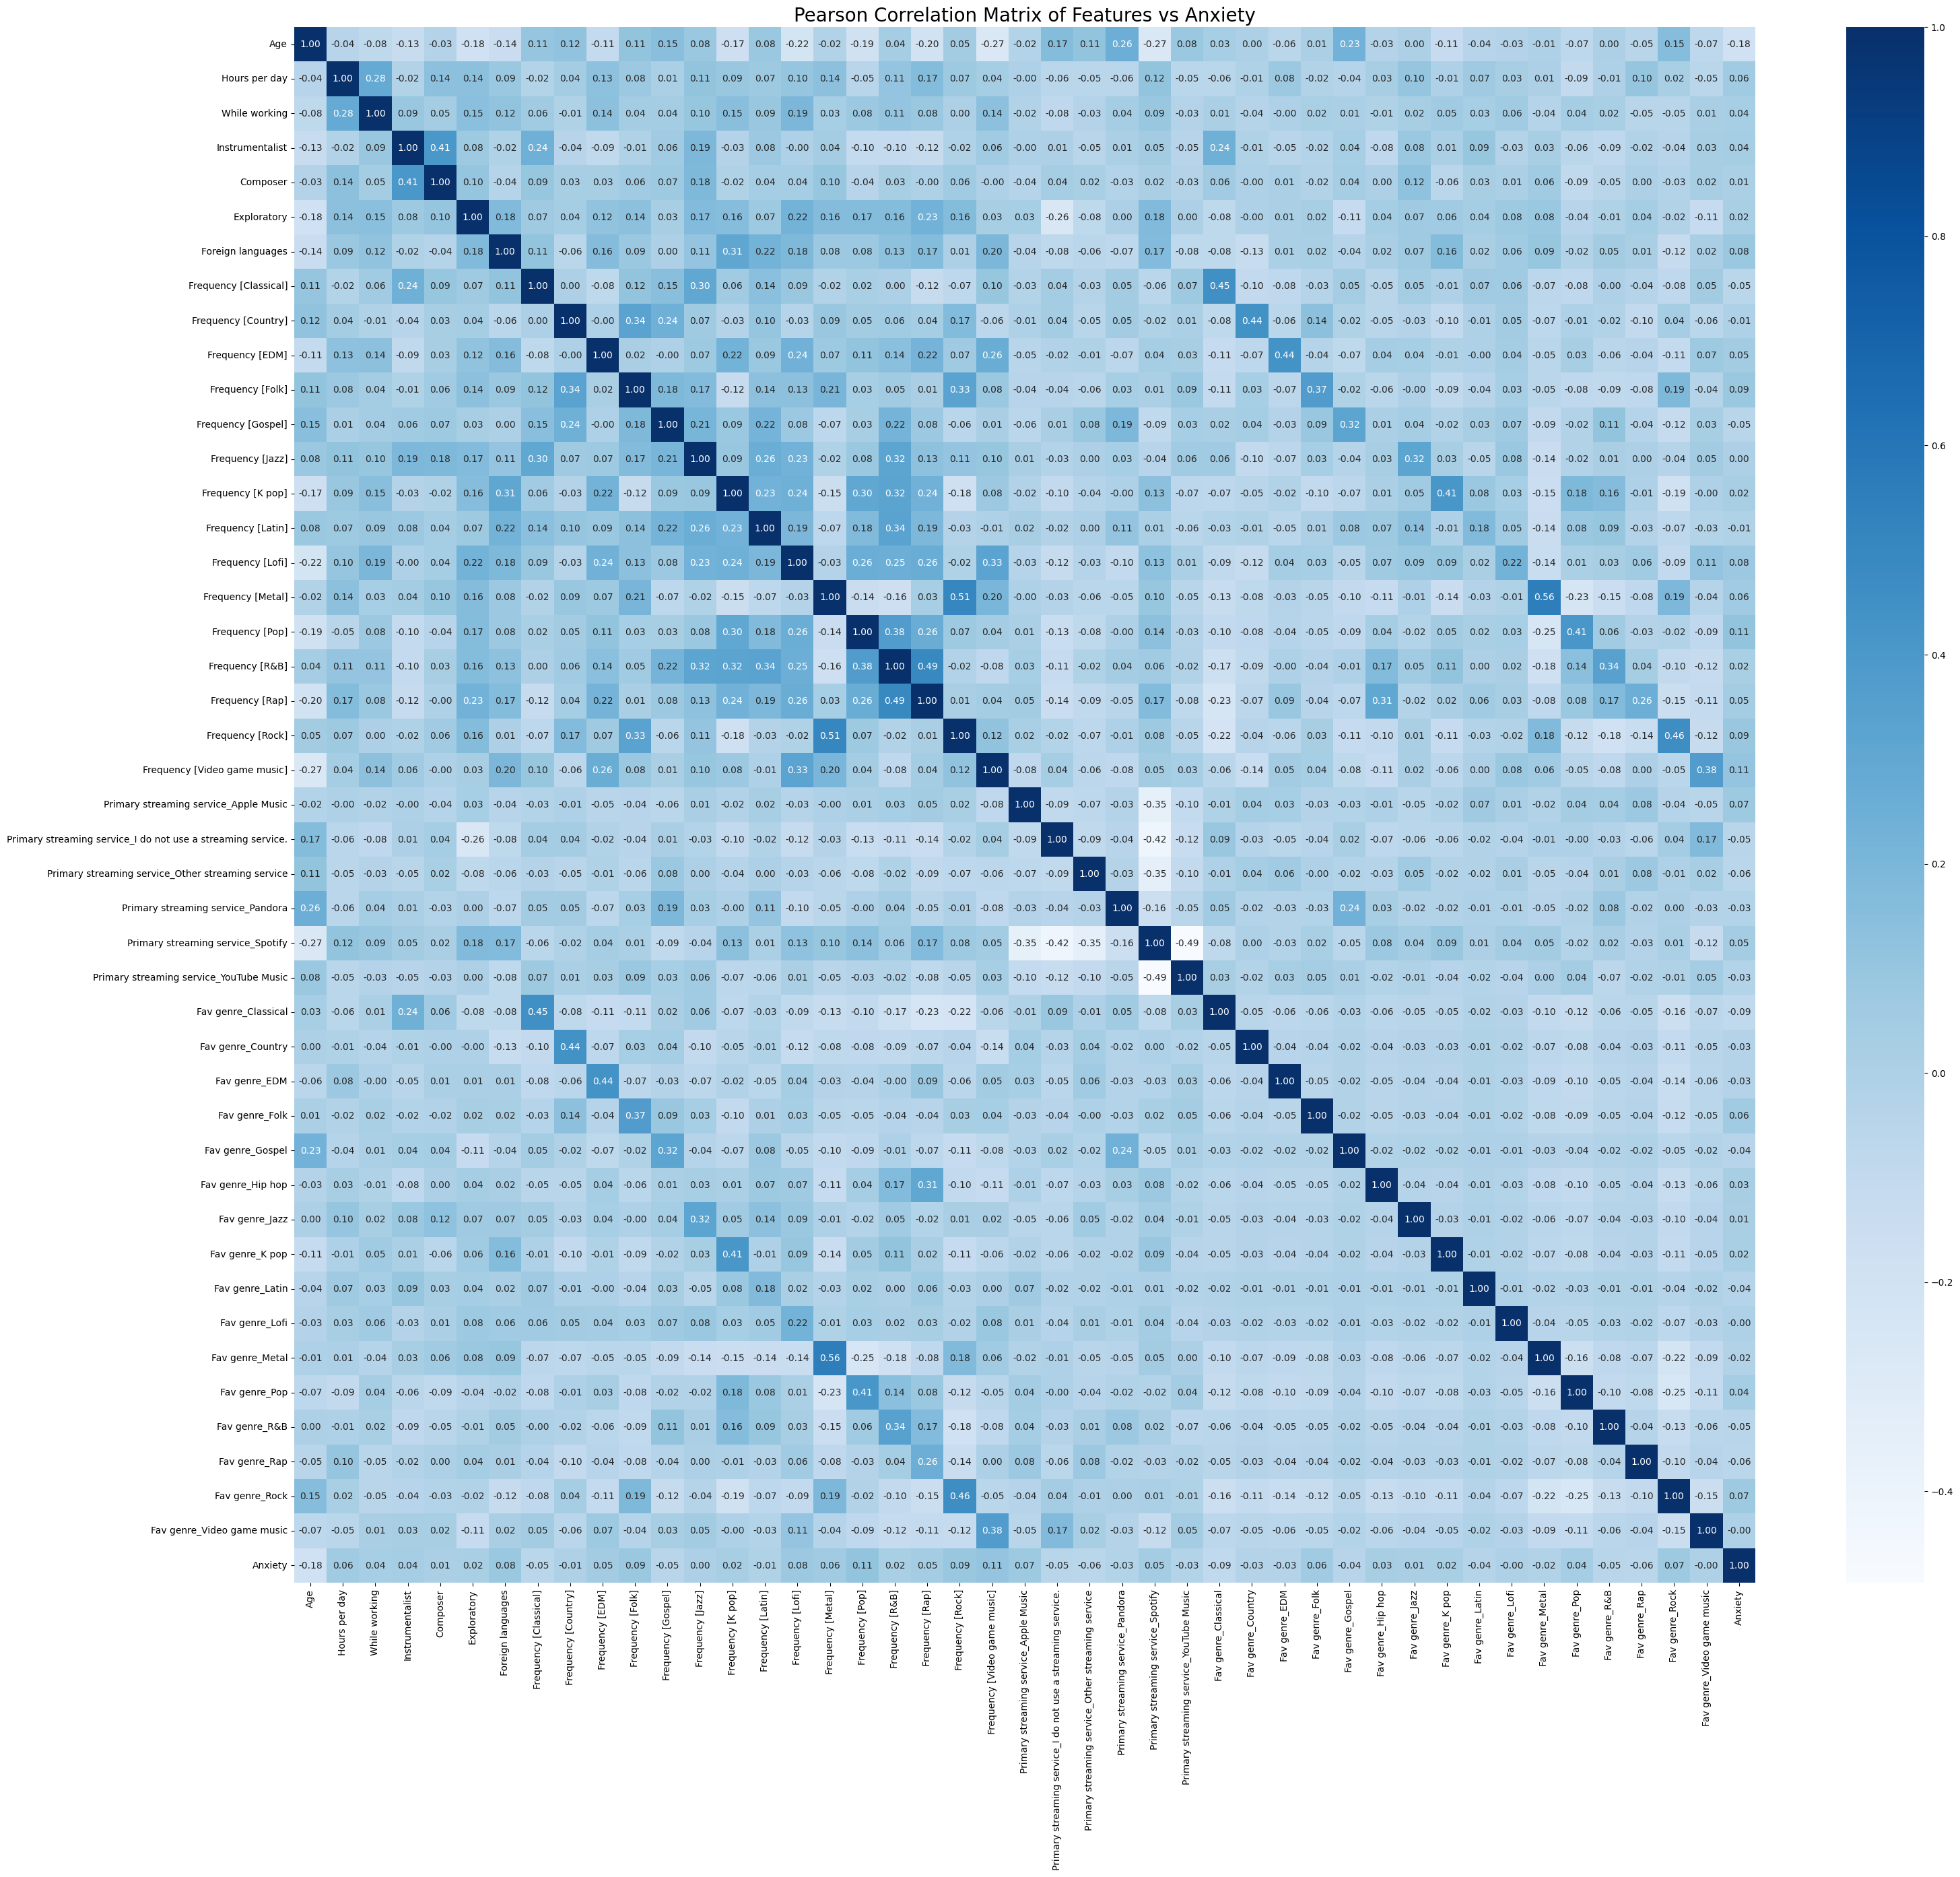

In [24]:
    # Anxiety
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs Anxiety', fontsize=20)
sns.heatmap(anxiety_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs Depression'}>

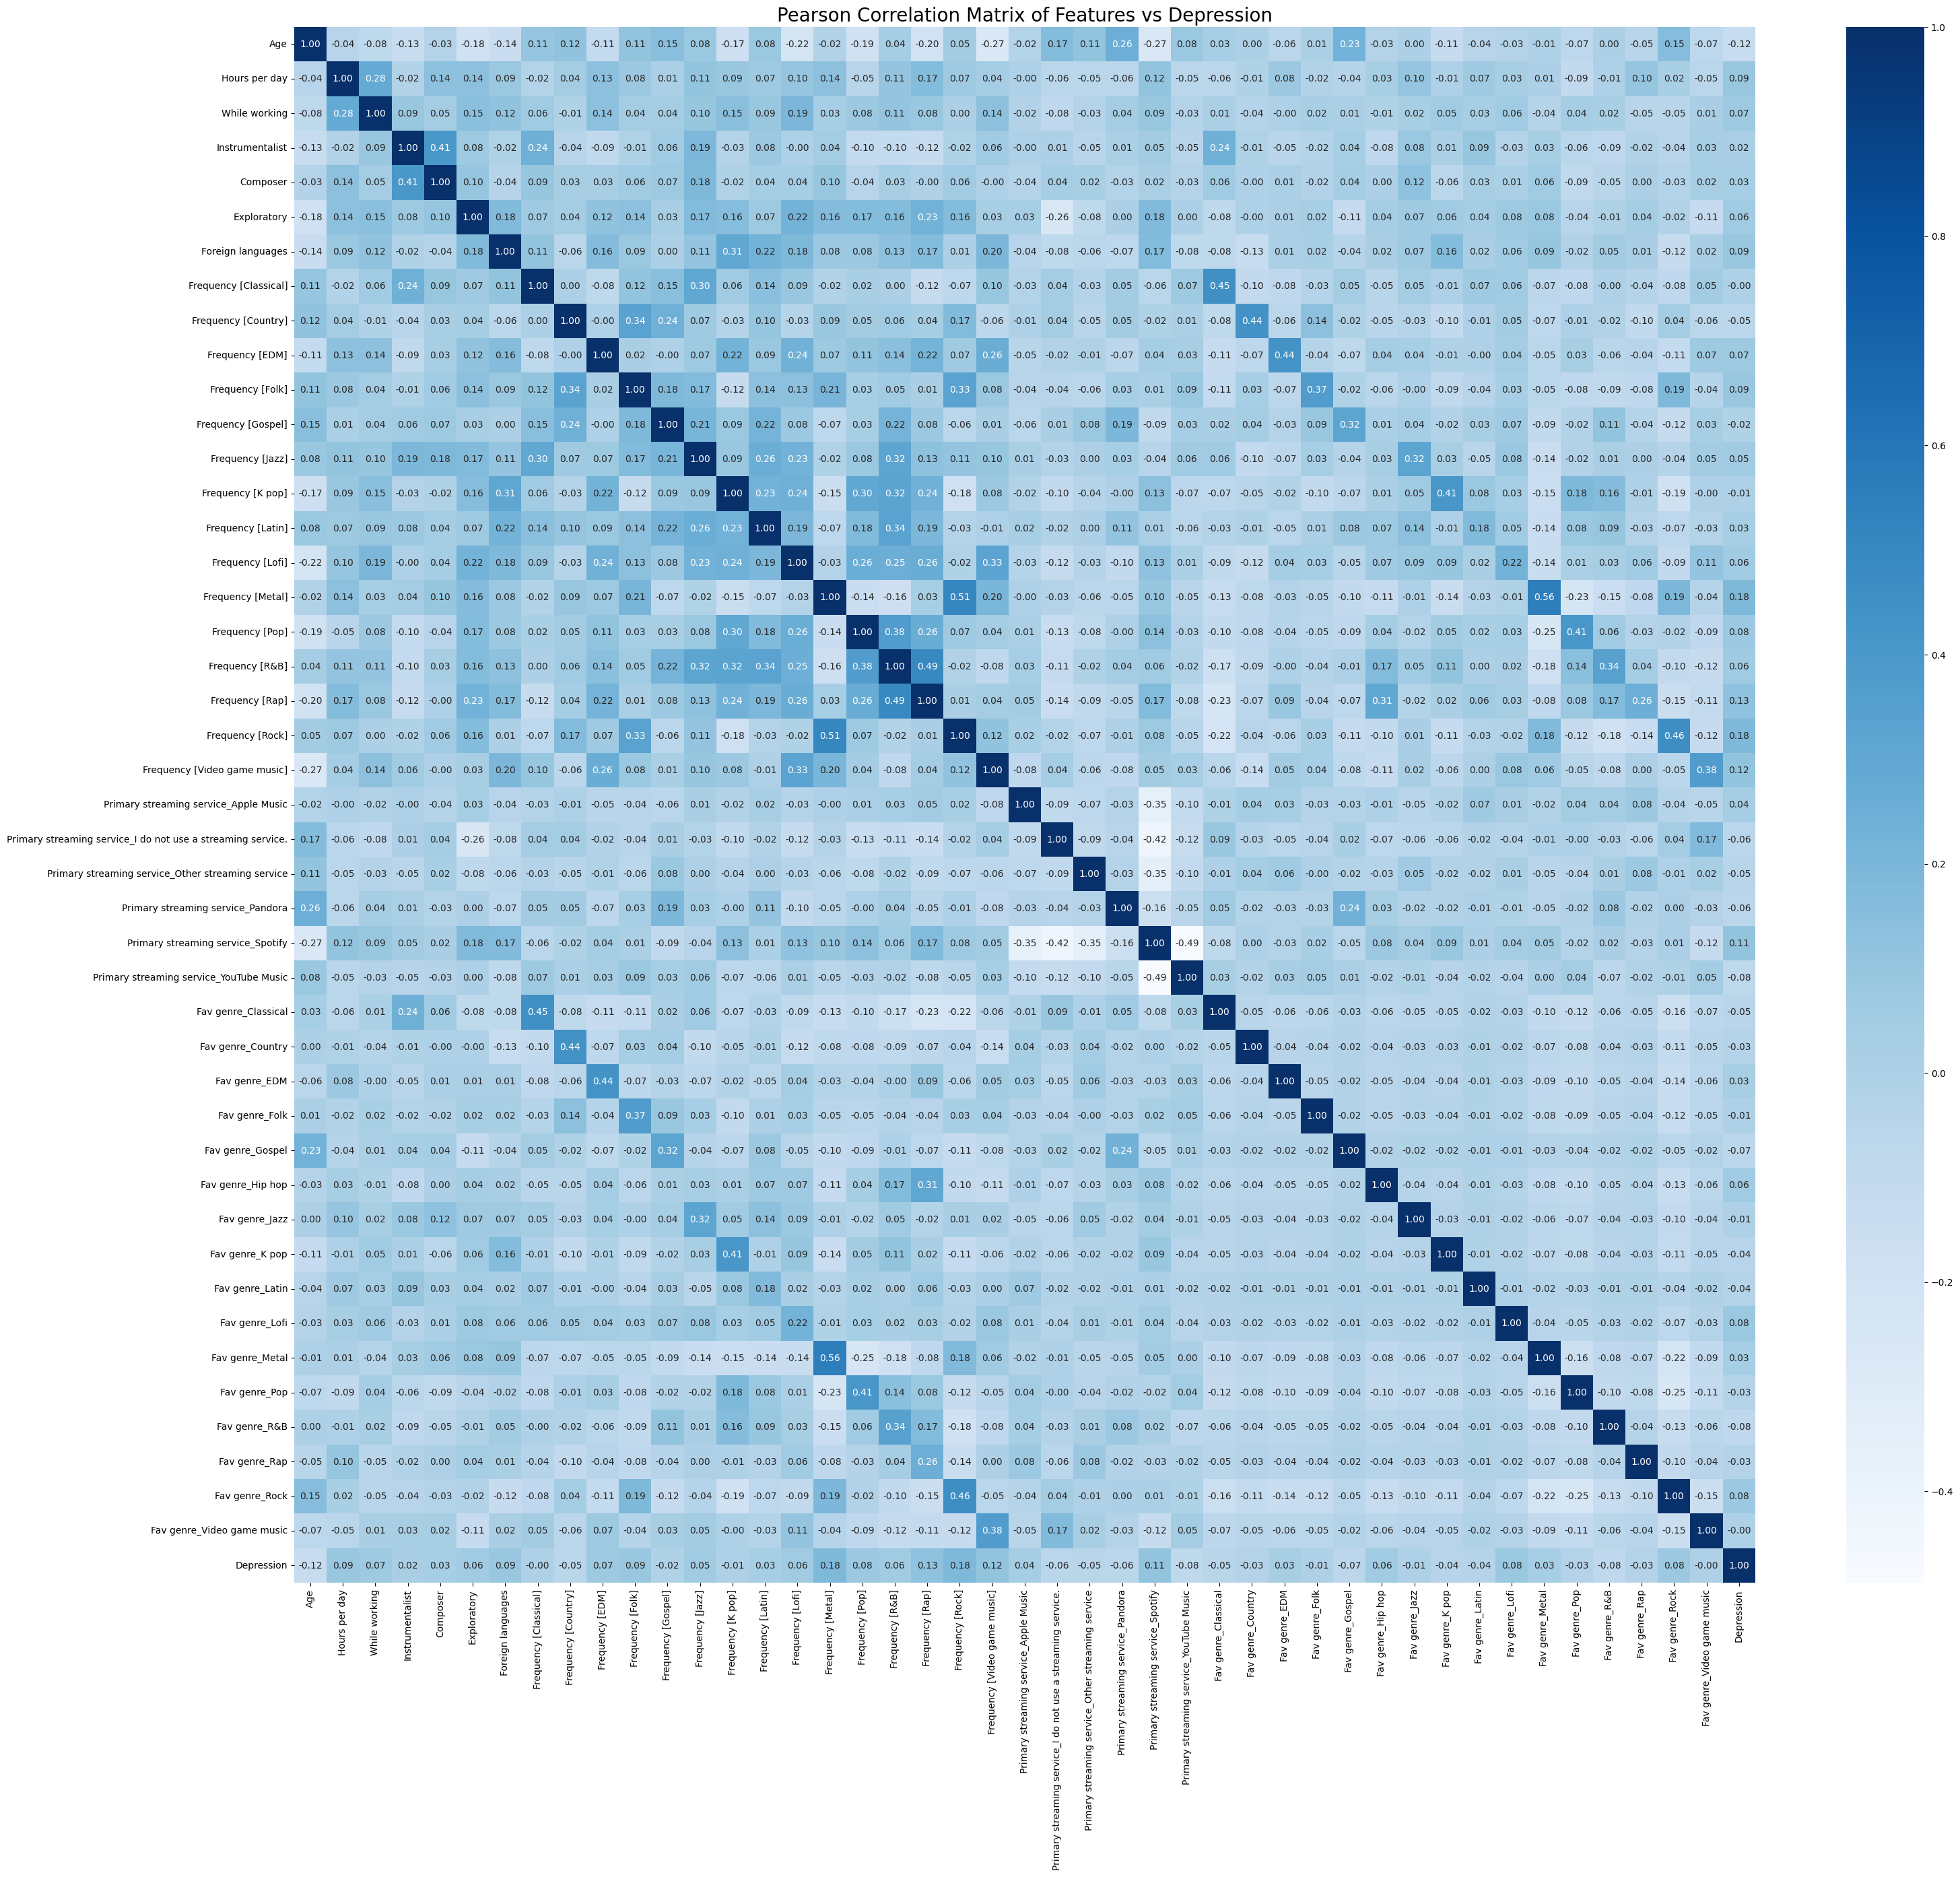

In [25]:
    # Depression
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs Depression', fontsize=20)
sns.heatmap(depression_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs OCD'}>

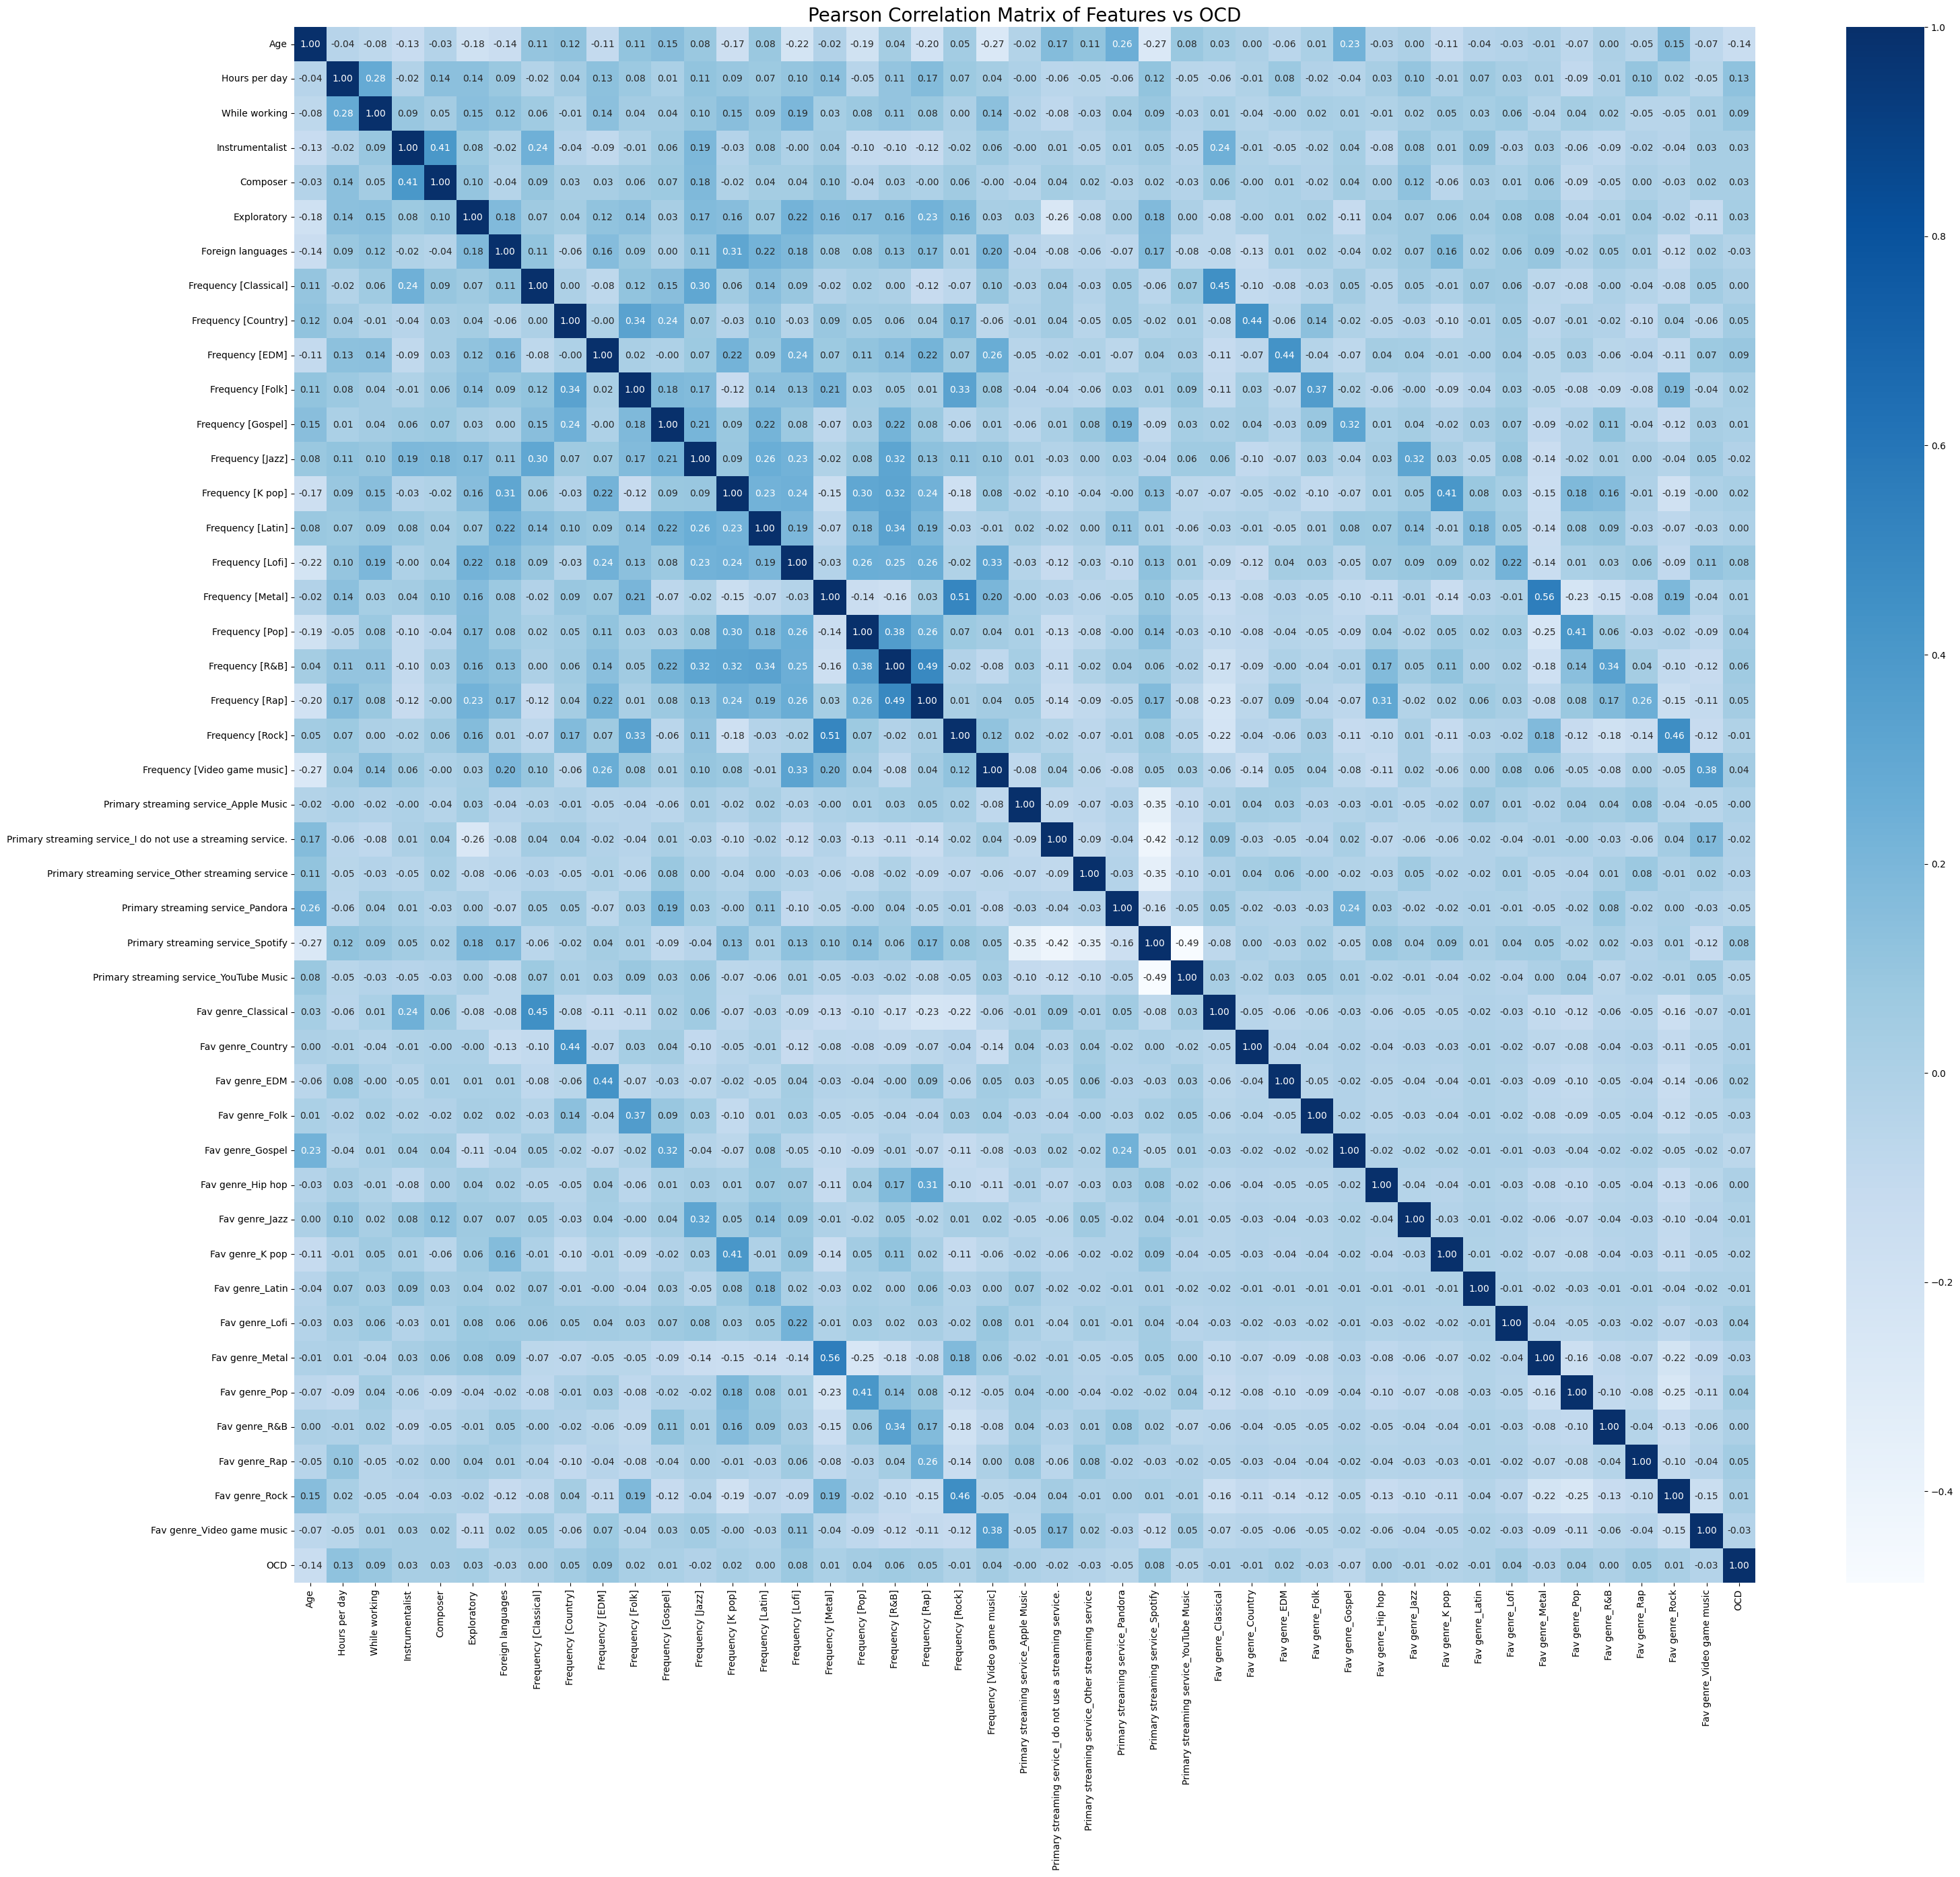

In [26]:
    # OCD
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs OCD', fontsize=20)
sns.heatmap(ocd_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs Insomnia'}>

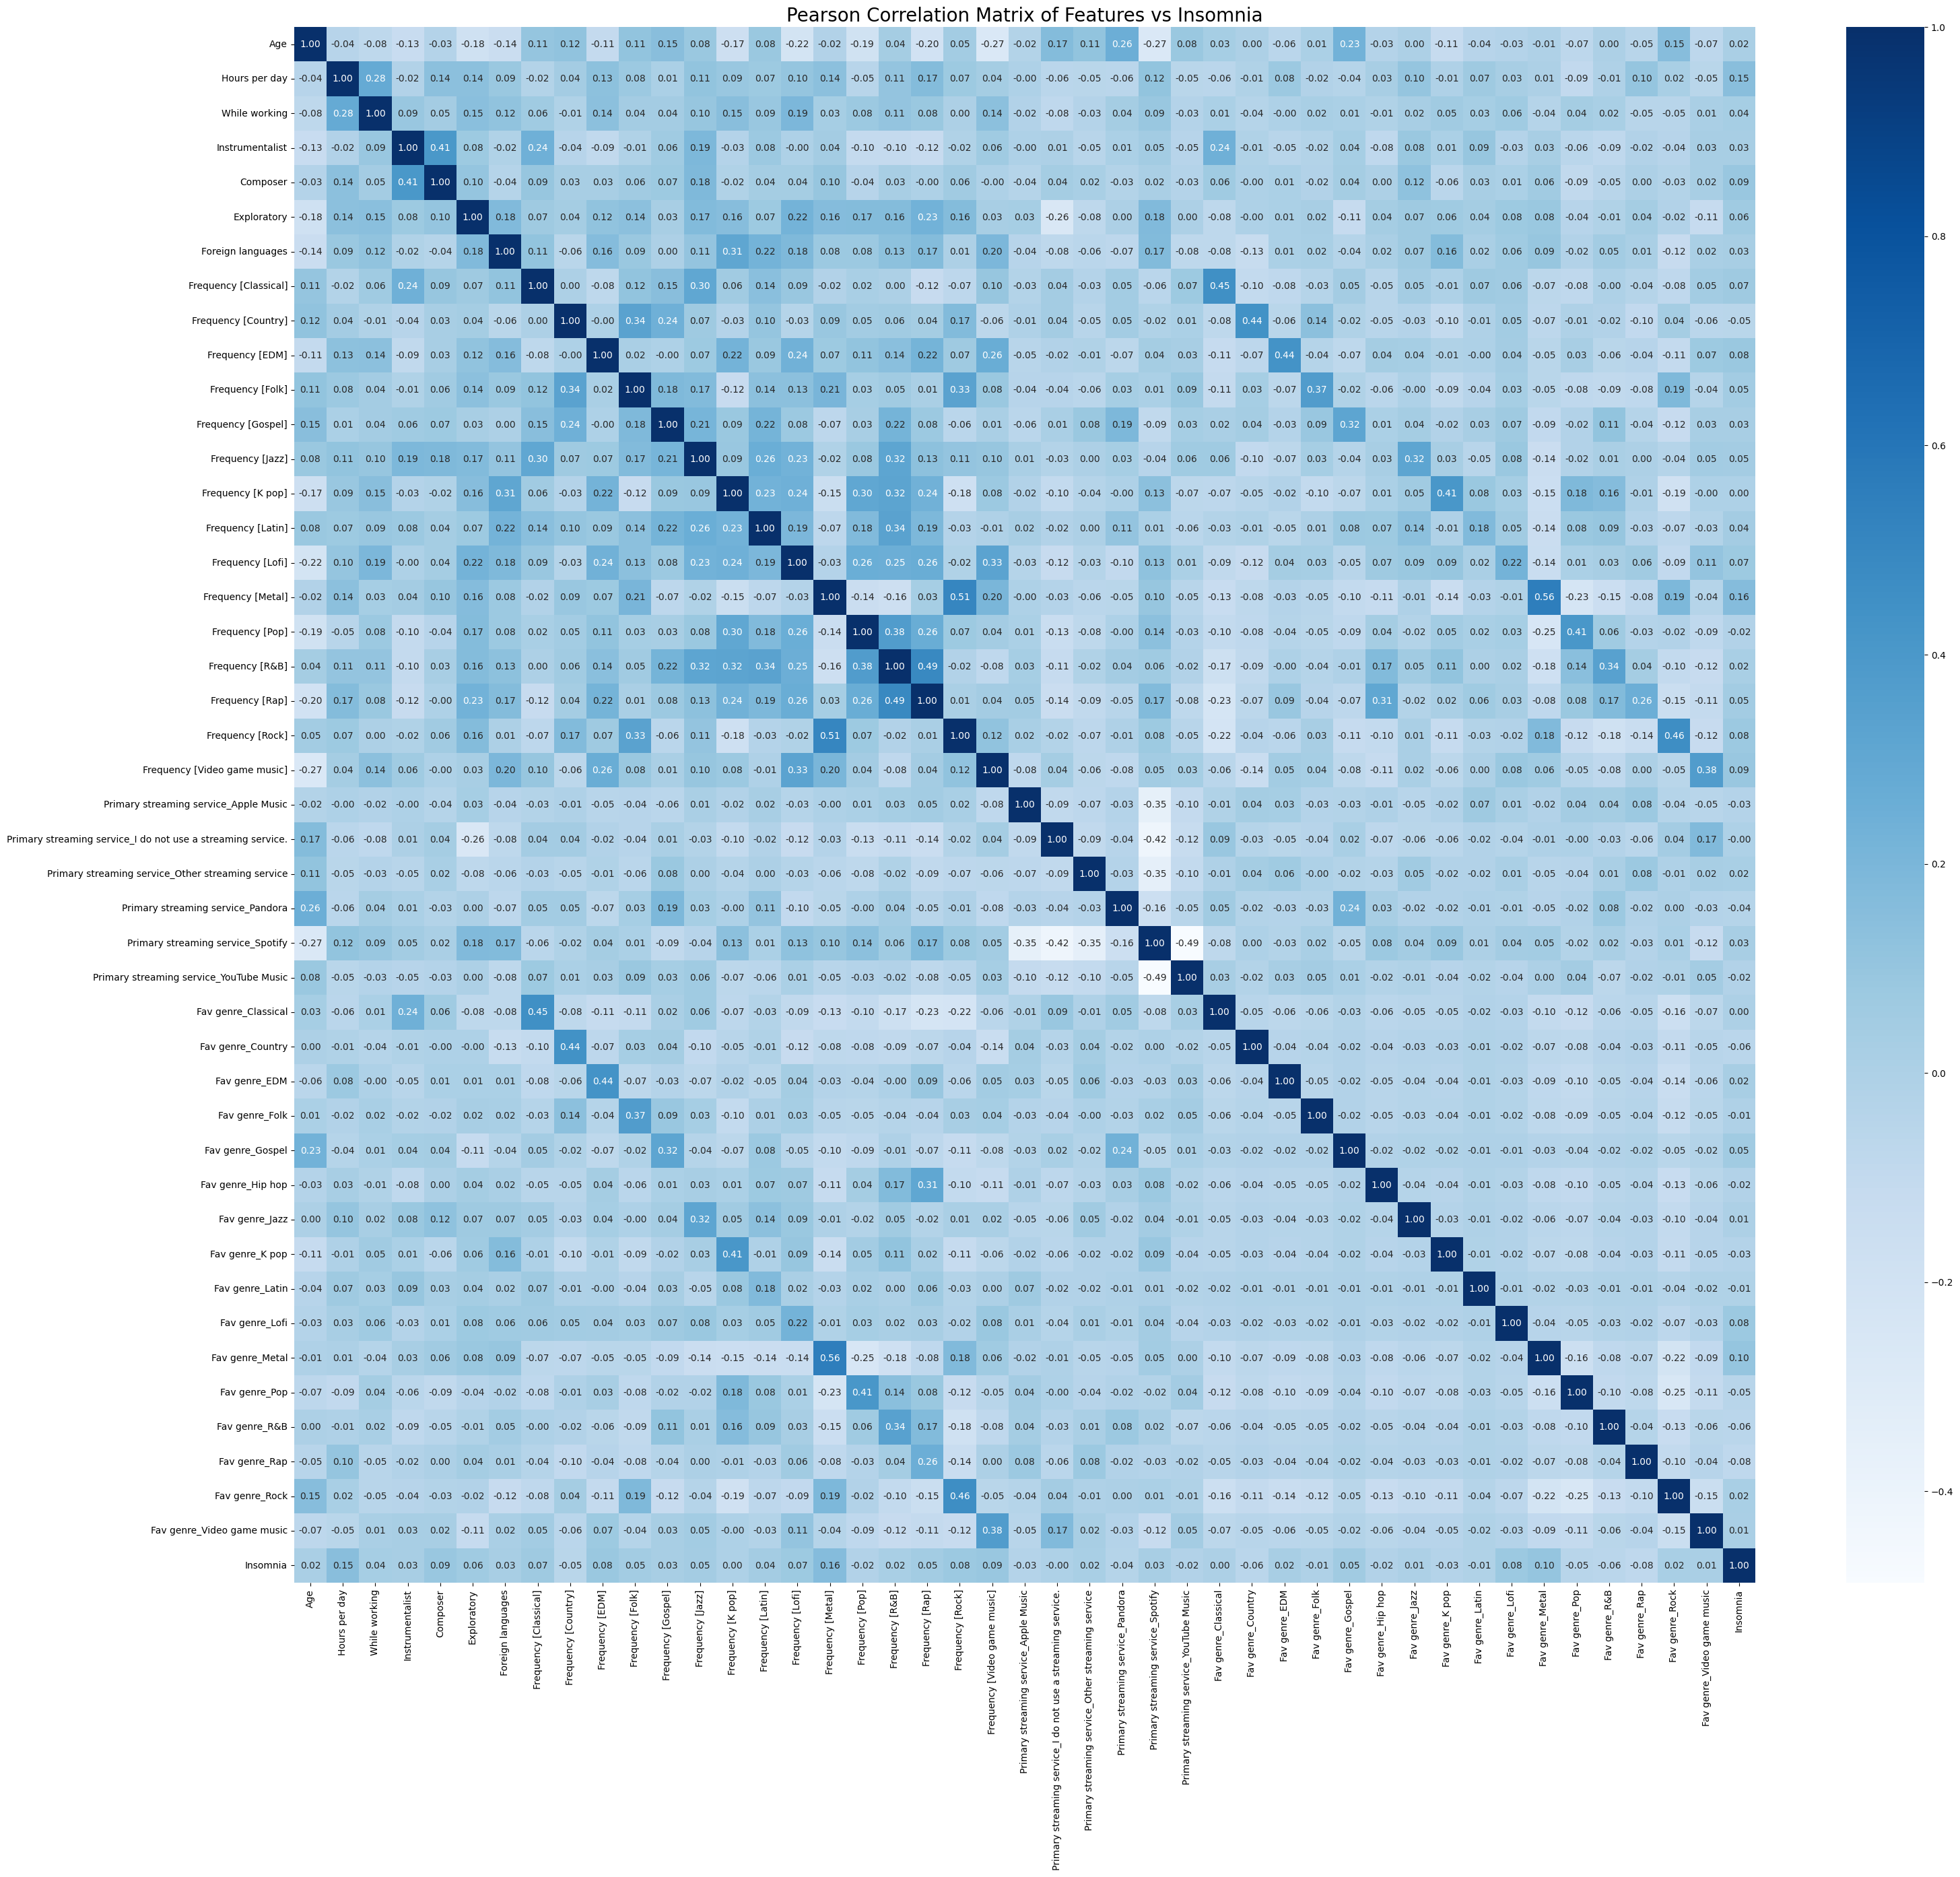

In [27]:
    # Insomnia
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs Insomnia', fontsize=20)
sns.heatmap(insomnia_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')